# Part A
## Question 1

In [2]:
# Import modules, and give them short aliases so we can write e.g. np.foo rather than numpy.foo
import numpy as np
import pandas
import matplotlib
import matplotlib.pyplot as plt
# The next line is a piece of magic, to let plots appear in our Jupyter notebooks
%matplotlib inline 
!pip install ucamcl --upgrade
import ucamcl
import numpy as np
GRADER = ucamcl.autograder('https://markmy.solutions', course='scicomp', section='assignment3a')

Waiting for you to log in .. done.


In [2]:
# Execute a unix command to download a file (if it's not already downloaded), and show download progress
import os.path
if os.path.exists('flood.csv'):
    print("file already downloaded")
else:
    !wget "https://teachingfiles.blob.core.windows.net/scicomp/flood.csv"

file already downloaded


In [3]:
in_flood = pandas.read_csv('flood.csv')
y = in_flood.iloc[np.random.choice(len(in_flood), size=20)]
y

,label,id,lat,lng,town,river,measure_id,qualifier,parameter,period,low,high,valuetype,t,value
12143,Weston Bampfylde,52113,51.023159,-2.565568,Weston Bampfylde,River Cam,919,Stage,Water Level,900.0,0.026,0.600,instantaneous,2017-08-23T08:30:00Z,0.067
13613,Cambridge Baits Bite,E60101,52.236542,0.176925,Milton,River Cam,1455,Stage,Water Level,900.0,0.218,0.294,instantaneous,2017-08-10T17:15:00Z,0.240
1633,Cambridge Jesus Lock,E60501,52.212835,0.120872,Cambridge,River Cam,1702,Stage,Water Level,900.0,0.637,0.740,instantaneous,2017-08-24T05:00:00Z,0.676
1783,Cambridge Jesus Lock,E60501,52.212835,0.120872,Cambridge,River Cam,1702,Stage,Water Level,900.0,0.637,0.740,instantaneous,2017-08-25T08:00:00Z,0.669
16026,Cam,2514,51.699985,-2.360238,Cam,River Cam,1636,Stage,Water Level,900.0,0.578,0.782,instantaneous,2017-08-08T13:00:00Z,0.809
3180,Dernford,E21737,52.134462,0.141784,Great Shelford,River Cam,1724,Stage,Water Level,900.0,0.127,0.395,instantaneous,2017-08-12T20:45:00Z,0.101
7308,Bin Brook,E19035,52.197227,0.087527,Cambridge,Bin Brook,1792,Stage,Water Level,900.0,0.057,0.368,instantaneous,2017-08-28T05:45:00Z,0.148
3673,Dernford,E21737,52.134462,0.141784,Great Shelford,River Cam,1724,Stage,Water Level,900.0,0.127,0.395,instantaneous,2017-08-17T11:45:00Z,0.099
17269,Cam,2514,51.699985,-2.360238,Cam,River Cam,1636,Stage,Water Level,900.0,0.578,0.782,instantaneous,2017-08-21T17:15:00Z,0.797
4880,Dernford,E21737,52.134462,0.141784,Great Shelford,River Cam,1724,Stage,Water Level,900.0,0.127,0.395,instantaneous,2017-08-30T00:30:00Z,0.082


In [4]:
flood = in_flood[in_flood['town']!='Cam']
num_rows = len(flood)
GRADER.submit_answer(GRADER.fetch_question('q1'), num_rows)

Correct!


True

## Question 2

In [5]:
townriver = flood.groupby(['river','town']).apply(len)
townriver = townriver.unstack(fill_value=0).rename_axis(None,axis=0).rename_axis(None,axis=1)
GRADER.submit_answer(GRADER.fetch_question('q2'), townriver.as_matrix())

/home/yiyi/myPyEnv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


Correct!


True

## Question 3

In [6]:
rtl = flood.groupby(['river', 'town','label']).apply(len)
measurement = rtl.groupby(['river','town']).apply(len)
measurement = measurement.unstack(fill_value=0).rename_axis(None,axis=0).rename_axis(None,axis=1)
GRADER.submit_answer(GRADER.fetch_question('q3'), measurement.as_matrix())

/home/yiyi/myPyEnv/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


Correct!


True

## Qeustion 4

In [7]:
flood['norm_value'] = (flood['value'] - flood['low']) / (flood['high'] - flood['low'])
tercile = np.nanpercentile(flood['norm_value'], [100/3,200/3])
GRADER.submit_answer(GRADER.fetch_question('q4'), [tercile[0], tercile[1]])

/home/yiyi/myPyEnv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Correct!


True

In [13]:
tercile

array([0.03697024, 0.31511254])

## Qeustion 5

In [8]:
flood['norm_value_tercile'] = 'med'
flood['norm_value_tercile'] = np.where((flood['norm_value'] <= tercile[0]),'low',flood['norm_value_tercile'])
flood['norm_value_tercile'] = np.where((flood['norm_value'] > tercile[1]),'high',flood['norm_value_tercile'])

containsavalidvalue = np.invert(flood['value'].isnull())
flood = flood[containsavalidvalue]

observation = flood.groupby(['label','norm_value_tercile']).apply(len)
observation = observation.reset_index()
observation.columns = ['label', 'norm_value_tercile', 'n']

observation2 = flood.groupby(['label']).apply(len)
observation2 = observation2.reset_index()
observation2.columns = ['label', 'ntot']

q5_dataframe = observation.merge(observation2, on='label')

GRADER.submit_answer(GRADER.fetch_question('q5'), q5_dataframe)

/home/yiyi/myPyEnv/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/yiyi/myPyEnv/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/yiyi/myPyEnv/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: ht

Correct!


True

## Qeustion 6

In [9]:
fraction = q5_dataframe.groupby(['label', 'norm_value_tercile']).apply(lambda df: np.mean(df['n']/df['ntot']))
fraction = fraction.unstack(fill_value=0).reset_index()
GRADER.submit_answer(GRADER.fetch_question('q6'), fraction)

Correct!


True

## Qeustion 7

In [10]:
highlow = flood[['label','high','low']]
highlow = highlow.drop_duplicates().reset_index()
highlow = highlow.iloc[:,1:]

highlow.groupby(['label']).apply(len)
highlow.groupby(['label'])['high','low'].apply(lambda x: x.iloc[0]).unstack()

highlow2 = pandas.melt(highlow, id_vars=['label'], var_name = 'ref', value_name = 'prop')
highlow2 = highlow2.groupby(['label','ref']).apply(lambda df: np.mean(df['prop']))

GRADER.submit_answer(GRADER.fetch_question('q7'), highlow2.reset_index(name='val'))

Correct!


True

# Part B
## Question 8

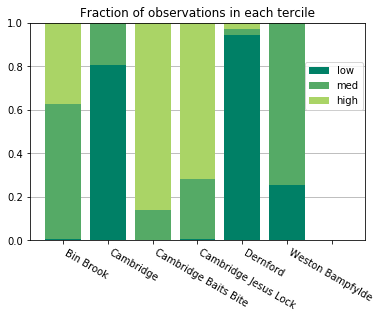

In [11]:
label = fraction['label'].tolist()
label.append('')
low = fraction['low'].tolist()
low.append(0)
med = fraction['med'].tolist()
med.append(0)
lowmed = (fraction['low']+fraction['med']).tolist()
lowmed.append(0)
high = fraction['high'].tolist()
high.append(0)

# Draw grid lines behind other graph elements
plt.rc('axes', axisbelow=True)
plt.grid(axis="y", zorder=0)

plt.bar(label, low, color='#008066', label='low')
plt.bar(label, med, bottom=low, color='#55AA66', label='med')
plt.bar(label, high, bottom=lowmed, color='#AAD466', label='high')
plt.legend(loc=[0.82, 0.6])

locs, labels = plt.xticks()
plt.setp(labels, rotation=-30,  ha='left')

plt.title('Fraction of observations in each tercile')
plt.show()

## Question 9

In [14]:
# Create a column with datetime objects
import datetime
import pytz
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

def as_datetime(s): return datetime.datetime.strptime(s, '%Y-%m-%dT%H:%M:%SZ').replace(tzinfo=pytz.UTC)
flood['datetime'] = np.vectorize(as_datetime)(flood['t'])

In [23]:
graphdf= highlow

graphdf['ter1'] = graphdf['low']+(tercile[0]*(graphdf['high']-graphdf['low']))
graphdf['ter2'] = graphdf['low']+(tercile[1]*(graphdf['high']-graphdf['low']))

graphdf.sort_values(by=['label'],inplace=True)
graphdf = graphdf.reset_index()

/home/yiyi/myPyEnv/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


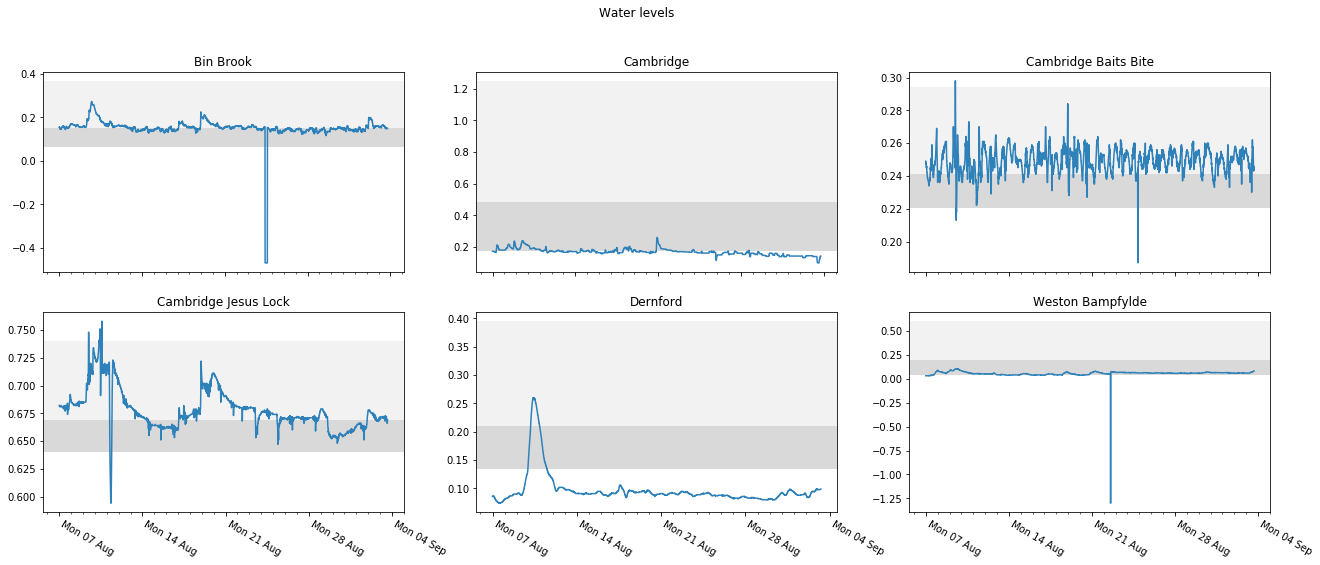

In [30]:
f = plt.figure(figsize=(22,9))
level = flood[['label','datetime','value']]

for i in range(6):
    ax = f.add_subplot(2,3,i+1)
    label = graphdf['label'][i]
    
    #create a new dataframe consisting of the entries that pertain to the currently investigated dataframe
    entries = level[np.where(level['label']==label,True, False)]
    #sort the entries in terms of time which is necessary for an appropriate temporal progression to the
    #time plitting
    entries.sort_values(by=['datetime'],inplace=True)
    values = entries['value'].tolist()
    times = entries['datetime'].values
    
    #plot the line graph accordingly
    plt.plot(times,values,animated=True,aa=True,color='#2F81B9')
     
    plt.title(label)
    #plot the shaded regions
    plt.axhspan(ymin=graphdf['ter1'][i], ymax=graphdf['ter2'][i], color='#D9D9D9')
    plt.axhspan(ymin=graphdf['ter2'][i], ymax=graphdf['high'][i], color='#F2F2F2')
    #convert the x axis labels into a convenient to interpret date format
    ax.xaxis.set_major_locator(matplotlib.dates.WeekdayLocator(byweekday=matplotlib.dates.MO, tz=pytz.UTC))
    ax.xaxis.set_minor_locator(matplotlib.dates.DayLocator(tz=pytz.UTC))
    ax.xaxis.set_major_formatter(matplotlib.dates.DateFormatter('%a %d %b'))
    
    
f.suptitle('Water levels')
f.autofmt_xdate(bottom=0.2, rotation=-30, ha='left')